# Acoustic and textual data analysis with Python

This practical work focuses on Python programming language's capabilities in analyzing textual and acoustic data. This practical work will cover the basics of Python programming, key concepts in acoustics and textual data, and how to use Python to analyze these data. By the end of this practical work, you will be able to confidently use Python to analyse acoustics and textual data. More specifically here you will learn the following:

- Python objects and how to effectively use them
- Web-scraping for text, tokenisation and stemming of text, and basic textual feature extraction (tf-idf)
- Audio encodings, conversion of the encodings, and analysis of spectrograms

## Setting up the environment

Before doing anything, we first need to install the packages that are going to be used in this practical work.

In [1]:
!pip install beautifulsoup4==4.11.2
!pip install nltk==3.8.1
!pip install numpy==1.24.1
!pip install pandas==1.5.3
!pip install -U scikit-learn==1.2.1
!pip install ffmpeg-python==0.2.0
!pip install scipy==1.10.0
!pip install matplotlib==3.6.3

## Python basics

It is essential to have a basic understanding of the fundamentals of Python programming for this practical work. Here, you should be familiar with the following concepts:

- Objects (every entity in python refers to an object)
- Variables, functions and control flow


### Exercise 1: Variables
In the code below, we first want the dictionary `b` to have the same values of the dictionary `a`, but be different for the item `0`. However, after writing the function `change_value_for_zero` to do this task, we realise the results are not as expected. How can we fix the code below? Please also add your explanation of the problem as the `explain` variable.

In [2]:
def change_value_for_zero(inp):
    out = inp.copy()
    out[0] = "d"
    return out

a = {0:"a", 1:"b", 2:"c"}
b = change_value_for_zero(a)
print("a:", a)
print("b:", b)

explain = "..."
print("What caused the problem:", explain)

a: {0: 'd', 1: 'b', 2: 'c'}
b: {0: 'd', 1: 'b', 2: 'c'}
What caused the problem: ...


### Exercise 2: Objects
Here we want to define Python classes for a classroom and its students, to make adding new students to the class easier and more automated. However, we simply do not know how the attributes we consider for each student now will change over time. For example, at first we might only be interested in the student's name, but some time later we might also want to consider the student's hometown. Therefore, the script we write must allow for this variability.

First, we want to write a class to represent the students of different classes called `classroom`. However, here it is used to represent the students of an `NLP class` (look at the `main` function below). We also want this class to be able to write a csv file. The csv file must contain the attributes (id, name, etc.) as colums, and each row represents a student.

**Attention**: the `main` function shall not be changed. The attributes (name, age, town, etc.) shall not be named explicitly in the `classroom` class. The idea is to be able to reuse the `classroom` class for other purposes, avoid `hard-coding` ([see here](https://en.wikipedia.org/wiki/Hard_coding)), and keep the codes `extensible` ([see here](https://en.wikipedia.org/wiki/Extensible_programming)).

In [5]:
import pandas as pd
import os
class classroom():
    def __init__(self):
        self.first_id = 0
        self.students = {}
    
    def add_student(self, **kwargs):
        student_id = self.first_id
        self.first_id += 1
        self.students[student_id] = {"id": student_id}
        self.students[student_id].update(kwargs)
    
    def write_to_csv(self, path):
        df = pd.DataFrame(self.students).transpose()
        df.to_csv(path, index=False)

def main():
    nlp_class = classroom()
    nlp_class.add_student(name="François")
    nlp_class.add_student(name="Benjamin")
    nlp_class.add_student(name="Didier", age=23)
    nlp_class.add_student(name="Fabien", town="Paris")
    csv_path = "./students.csv"
    nlp_class.write_to_csv(csv_path)
    os.system(f"cat {csv_path}")
    
main()

id,name,age,town
0,François,,
1,Benjamin,,
2,Didier,23,
3,Fabien,,Paris


## Text analysis with python

Text analysis is an increasingly important tool for researchers to gain insight from large amounts of data. Python for text analysis has become extremely popular lately, due to its flexibility and wide range of libraries and packages. In this section we discuss the following:

- web scraping and extracting a specific text
- tokenisation, and stemming the text
- loading text-based datasets
- basic feature extraction for dataset analysis


### Exercise 3: Text analysis basics

Here, we first want to find the `description` in the `meta content` of [UGA website's main page](https://www.univ-grenoble-alpes.fr). Then, we want to automatically analyse its contents. For this purpose, we would like to first tokenise the text, and then find the stems of each word. See [here](https://medium.com/@jeevanchavan143/nlp-tokenization-stemming-lemmatization-bag-of-words-tf-idf-pos-7650f83c60be) and [here](https://dair.ai/notebooks/nlp/2020/03/19/nlp_basics_tokenization_segmentation.html) for more information on the mentioned concepts, as well as practical application.

In [6]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import FrenchStemmer
nltk.download('punkt') # to download the tokenisers

def get_text(URL):
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    #print(soup)
    results = soup.find("meta", {"name":"description"})
    #results = soup.find(name="description")
    txt = results.prettify()
    txt = txt.replace("<meta content=\"", "")
    txt = txt.replace("\" name=\"description\"/>", "")
    return txt

def tokenise_text(txt):
    tokenized = []
    for word in txt.split():
        tokenized += word_tokenize(word, language='french')
    tokenized_txt = " ".join(tokenized)
    return tokenized_txt


def stem_text(tokenized_txt):
    stemmer = FrenchStemmer()
    stemmed = [stemmer.stem(word) for word in tokenized_txt.split(" ")]
    stemmed_txt = " ".join(stemmed)
    return stemmed_txt

def main():
    txt = get_text("https://www.univ-grenoble-alpes.fr")
    tokenized_txt = tokenise_text(txt)
    stemmed_txt = stem_text(tokenized_txt)
    print("original text:", txt)
    print("tokenized text:", tokenized_txt)
    print("stemmed text:", stemmed_txt)

main()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sinaalisamir/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


original text: Nous vous offrons tout l’éventail des disciplines universitaires en formation initiale et tout au long de la vie : de la littérature à la physique des particules en passant par l’ingénierie, l'architecture, la politique, la sociologie, la médecine... De quoi construire des parcours de formation riches, flexibles, adaptés aux aspirations de chacun et permettant un accès rapide à l'emploi.

tokenized text: Nous vous offrons tout l ’ éventail des disciplines universitaires en formation initiale et tout au long de la vie : de la littérature à la physique des particules en passant par l ’ ingénierie , l'architecture , la politique , la sociologie , la médecine ... De quoi construire des parcours de formation riches , flexibles , adaptés aux aspirations de chacun et permettant un accès rapide à l'emploi .
stemmed text: nous vous offron tout l ’ éventail de disciplin universitair en format initial et tout au long de la vi : de la littératur à la physiqu de particul en pass par 

### Excercise 4: Loading datasets

In this exercise we will learn how to load and analyse textual datasets. Here we will focus on a sentiment analysis dataset, called `Allociné`, which consists of reviews of French television series. These reviews can be positive (labelled `1`) or negative (labelled `0`). Here are your tasks for this excercise:

- Download the corpus
- `Allociné` is divided into three partitions of `train`, `dev`, and `test`. Write a script to load the `train` partition.

In [7]:
# Downloading the dataset
import os
dl_path = "http://sentiment.nlproc.org/sentiment-dataset-fr.zip"
os.system(f"wget {dl_path}")
os.system(f"unzip ./sentiment-dataset-fr.zip")

--2023-02-06 16:56:43--  http://sentiment.nlproc.org/sentiment-dataset-fr.zip
Resolving sentiment.nlproc.org (sentiment.nlproc.org)... 80.237.132.59
Connecting to sentiment.nlproc.org (sentiment.nlproc.org)|80.237.132.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318933 (311K) [application/zip]
Saving to: ‘sentiment-dataset-fr.zip.2’

     0K .......... .......... .......... .......... .......... 16% 1,33M 0s
    50K .......... .......... .......... .......... ........

Archive:  ./sentiment-dataset-fr.zip


.. 32% 2,66M 0s
   100K .......... .......... .......... .......... .......... 48% 12,8M 0s
   150K .......... .......... .......... .......... .......... 64% 12,2M 0s
   200K .......... .......... .......... .......... .......... 80% 4,04M 0s
   250K .......... .......... .......... .......... .......... 96% 11,2M 0s
   300K .......... .                                          100% 7,70M=0,08s

2023-02-06 16:56:43 (3,77 MB/s) - ‘sentiment-dataset-fr.zip.2’ saved [318933/318933]

replace fr/train.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


256

In [10]:
import numpy as np
def get_all_dataset(path):
    train_path = os.path.join(path)
    train_data = np.loadtxt(train_path, dtype='str', delimiter='\t', skiprows=0)
    return train_data

def get_positive_samples(data):
    cor=[]
    for d in data:
        if int(d[0]) == 1: cor.append(d)
    positives = np.array(cor)
    return positives
    
def get_negative_samples(data):
    cor=[]
    for d in data:
        if int(d[0]) == 0: cor.append(d)
    negatives = np.array(cor)
    return negatives

train_data = get_all_dataset("./fr/train.tsv")
train_data_positives = get_positive_samples(train_data)
train_data_negatives = get_negative_samples(train_data)

print("An example of a negative comment:\n", train_data_negatives[0,1])
print("An example of a positive comment:\n", train_data_positives[0,1])

An example of a negative comment:
 série inintéressante banale le scénario est décevant et on ne rentre pas du tout dans la série .
An example of a positive comment:
 probablement le meilleur pilote jamais réalisé pour une série télé . diablement addictif et interpété de manière inspiré , lost est une série à ne pas manquer .


### Excercise 5: Basic feature extraction

After loading the dataset, we want to see if we can somehow use each word to automatically distinguish between positive and negative comments. Automatic detection of negativity/positivity from text is called sentiment analysis, and it has many applications, especially in marketing campaigns and product analysis. The first step of such task, is to represent the text numerically in a way that is useful for sentiment analysis. Traditionally, a method called tf-idf is used to extract word-based features from different documents. tf–idf (also TF*IDF, TFIDF, TF–IDF, or Tf–idf), short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus, and is usually used in information retrieval (from [wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)). [See here](https://monkeylearn.com/blog/what-is-tf-idf/) for more information on tf-idf and its applications for machine learning.

In this excercise, we would like to extract numerical vectors to represent each word using the tf–idf method. In the code section below, 

- Using `TfidfVectorizer`, write a function that would get the training partition of the `Allociné` corpus, and applies the tf–idf.
- Transform the `Allociné`'s training partition to represent the stems of each word. Then apply tf-idf to the "stemmed" corpus.
- Then, explain which set of tf-idf features you prefer to use? the one from the original text of `Allociné` corpus, or its stemmed version? Explain why.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_vectorizer(corpus):
    vectorizer = TfidfVectorizer()
    _ = vectorizer.fit_transform(corpus)
    return vectorizer

def get_tfidf_of_words(text, vectorizer):
    words = text.split(" ")
    arr = vectorizer.transform([text]).toarray()[0]
    vocabulary = vectorizer.get_feature_names_out()
    vocab = list(vocabulary)
    indices = {}
    for word in words:
        for v in vocab:
            if word == v: 
                indices[word] = arr[vocab.index(v)]; break
    return indices    

corpus = train_data[:,1]
vectorizer = get_vectorizer(corpus)
tokenised_corpus = [tokenise_text(txt) for txt in corpus]
stemmed_corpus = [stem_text(txt) for txt in tokenised_corpus]
vectorizer_stemmed = get_vectorizer(stemmed_corpus)
example = corpus[0]
example_stemmed = stemmed_corpus[0]
tf_idfs = get_tfidf_of_words(example, vectorizer)
tf_idfs_stemmed = get_tfidf_of_words(example_stemmed, vectorizer_stemmed)
print("original text: ", example)
print("Tf-idf of the original text: ", tf_idfs)
print("stemmed text: ", example_stemmed)
print("Tf-idf of the stemmed text: ", tf_idfs_stemmed)

explain = "..."
print("Which set of features would you choose and why?", explain)

original text:  probablement le meilleur pilote jamais réalisé pour une série télé . diablement addictif et interpété de manière inspiré , lost est une série à ne pas manquer .
Tf-idf of the original text:  {'probablement': 0.30684300826274996, 'le': 0.07746647297560029, 'meilleur': 0.23216064282365767, 'pilote': 0.2529780889587472, 'jamais': 0.15968889999676267, 'réalisé': 0.27379553509383675, 'pour': 0.09938490482689923, 'une': 0.1405993223272793, 'série': 0.1153897543786456, 'télé': 0.203913128557212, 'diablement': 0.2977493398096495, 'addictif': 0.33509052252919563, 'et': 0.06156999488473097, 'interpété': 0.33509052252919563, 'de': 0.057537400956246494, 'manière': 0.25034797972985856, 'inspiré': 0.31856678594473903, 'lost': 0.18905299229449965, 'est': 0.061743885938724576, 'ne': 0.09659835567941386, 'pas': 0.07953176075145277, 'manquer': 0.23926598773294033}
stemmed text:  probabl le meilleur pilot jam réalis pour une ser tel . diabl addict et interpet de mani inspir , lost est une

### Excercise 6: Text analysis

Here, we want to see if there is a correlation between the `tf-idf` of each word and the sentiment labels. Fill in the function below to get the first `30` words with the most `tf-idf` values, for the positive and negative comments separately. Do you see a correlation between the words used and the sentiment labels?

In [12]:
def get_most_repeated(data, vectorizer):
    arr = vectorizer.transform(data[:,1])
    arr = np.mean(arr.toarray(),0)
    max_list = np.argsort(arr)[-30:]
    words = [vectorizer.get_feature_names_out()[m] for m in np.flip(max_list)]
    return words
    
positive_words = get_most_repeated(train_data_positives, vectorizer)
negative_words = get_most_repeated(train_data_negatives, vectorizer)
print("positive_words:", positive_words)
print("negative_words:", negative_words)

explain = "..."
print("Do you see a correlation of the words with the most tf-idf values, and sentiment labels?", explain)

positive_words: ['de', 'série', 'est', 'et', 'la', 'les', 'une', 'un', 'cette', 'que', 'des', 'le', 'je', 'très', 'bien', 'qui', 'en', 'on', 'tout', 'pas', 'sont', 'ne', 'avec', 'saison', 'pour', 'mais', 'vraiment', 'adore', 'acteurs', 'plus']
negative_words: ['de', 'est', 'pas', 'les', 'la', 'et', 'série', 'je', 'le', 'une', 'des', 'cette', 'que', 'un', 'en', 'ne', 'on', 'mais', 'pour', 'ai', 'plus', 'qui', 'du', 'vraiment', 'sont', 'acteurs', 'tout', 'nul', 'sans', 'qu']
Do you see a correlation of the words with the most tf-idf values, and sentiment labels? ...


## Acoustic signal analysis with Python

Acoustic signal analysis is a powerful tool used to extract meaningful information from acoustic recordings. Here, we cover the following topics:

- Different audio encodings and conversion
- Analysing acoustic recordings with spectrograms


In [13]:
# Downloading two audio recordings to analyse
dl_path = 'https://cdn.pixabay.com/download/audio/2023/01/09/audio_baaa3cfec7.mp3?filename=acoustic-guitar-loop-f-91bpm-132687.mp3'
os.system(f"curl {dl_path} --compressed -o guitar.mp3")
dl_path = "https://cdn.pixabay.com/download/audio/2022/03/15/audio_3e683188e5.mp3?filename=tooheavy-77056.mp3"
os.system(f"curl {dl_path} --compressed -o speech.mp3")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  330k  100  330k    0     0  1612k      0 --:--:-- --:--:-- --:--:-- 1704k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  773k  100  773k    0     0  2147k      0 --:--:-- --:--:-- --:--:-- 2241k


0

### Excercise 7: Audio encodings

Below, write a script to convert the `.mp3` files to `.wav` files formatted as `PCM signed 16-bit little-endian`. We would also like to have the file as `mono`, so that they only contain one channel. Last but not the least, change the sampling frequency of the files to `16000 Hz`. After writting the script, explain the questions asked in the code section below.

In [14]:
def convert_audio(input_path, output_path):
    args = '-ar 16000 -ac 1 -c:a pcm_s16le -af "volume=0dB" -hide_banner -v 0'
    os.system(f'ffmpeg -i {input_path} {args} -y {output_path}')

convert_audio("guitar.mp3", "guitar_converted.wav")
convert_audio("speech.mp3", "speech_converted.wav")

explain = "..."
print("What is the difference between mp3, and PCM formatted wav file?", explain)

explain = "..."
print("What is the sampling frequency, its difference with bit-rate?", explain)

explain = "..."
print("Analysing speech signals, and building machine learning models to recognise human speech are often done with 16KHz sampled audio files. Why do you think that is the case ?", explain)


What is the difference between mp3, and PCM formatted wav file? ...
What is the sampling frequency, its difference with bit-rate? ...
Analysing speech signals, and building machine learning models to recognise human speech are often done with 16KHz sampled audio files. Why do you think that is the case ? ...


### Excercise 8: Normalisation

It is a common practice to normalise the wav signal to contain values between zero and one. Write a very short script (can be one line) to normalise the wav file after `reading` it.

In [15]:
import scipy.io.wavfile as wav

def normalise_signal(sig):
    sig_normed = sig / 32767.0
    return sig_normed

(rate,sig) = wav.read("guitar_converted.wav")
sig_normed = normalise_signal(sig)
print("original signal values:", sig[995:1000])
print("normalised signal values", sig_normed[995:1000])

original signal values: [-899 -861 -929 -873 -742]
normalised signal values [-0.02743614 -0.02627644 -0.0283517  -0.02664266 -0.02264473]


### Excercise 9: Spectrograms

Below, we use the `matplotlib` package to plot the spectrograms of the two acoustic signals. A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time (from [wikipedia](https://en.wikipedia.org/wiki/Spectrogram)). After running the code below to plot the spectrograms, answer the following questions.

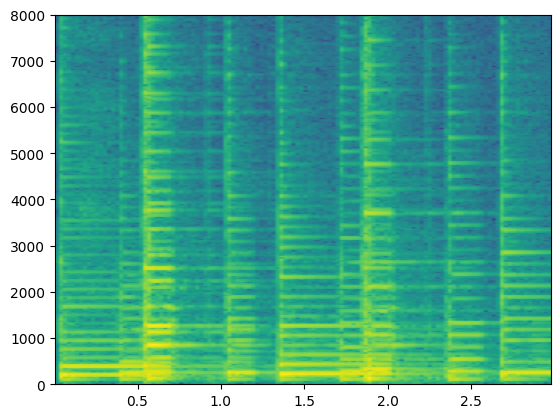

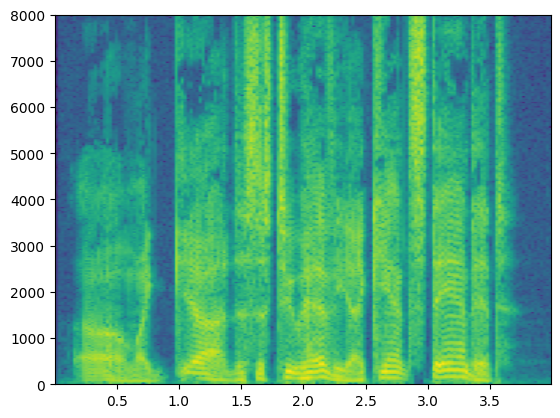

From the spectrograms, how can you tell which one is human speech, and which one is guitar sound? ...
Try chaning the value of NFFT, what change do you observe? why is that? ...


In [16]:
import matplotlib.pyplot as plt

(rate,sig) = wav.read("guitar_converted.wav")
spc, f, t, img = plt.specgram(sig[:rate*3], Fs=rate, NFFT=512) #spc, f, t, img
plt.show()

(rate,sig) = wav.read("speech_converted.wav")
spc, f, t, img = plt.specgram(sig[:rate*4], Fs=rate, NFFT=512) #spc, f, t, img
plt.show()

explain = "..."
print("From the spectrograms, how can you tell which one is human speech, and which one is guitar sound?", explain)

explain = "..."
print("Try chaning the value of NFFT, what change do you observe? why is that?", explain)


## Summary

In this practical work, the basics of acoustic and textual data analysis with Python have been explored. First, the fundamentals of Python were covered, focusing on classes and how to write clean codes. Then, the basics of text analysis were discussed, including downloading datasets and extracting basic features such as `tf-idf`. Finally, acoustic signal analysis with Python was discussed, focusing on audio encodings, conversion of the encodings, and acoustic analysis of different sounds with `spectrograms`. 